In [5]:
import sympy, numpy as np, matplotlib.pyplot as plt
from pyMatan import *

# --- 1. Limit as x -> 0 for sin(x)/x (Indeterminate Form 0/0) ---
func_1 = "sin(x)/x"
x0_1 = 0
limit_1 = symbolic_limit(func_1, x0_1)

print(f"Function: f(x) = {func_1}")
print(f"Limit x -> {x0_1} (Both Sides): {limit_1}") # Expected: 1


# --- 2. Limit at Infinity ---
func_2 = "x**2 / (2*x**2 + 5)"
x0_2 = sympy.oo # SymPy symbol for infinity
limit_2 = symbolic_limit(func_2, x0_2)

print(f"\nFunction: f(x) = {func_2}")
print(f"Limit x -> ∞: {limit_2}") # Expected: 1/2


# --- 3. Limit that Does Not Exist (Discontinuity) ---
# Calculates the limit for 1/x as x -> 0.
func_3 = "1/x"
x0_3 = 0
limit_3 = symbolic_limit(func_3, x0_3) # Should return sympy.nan

print(f"\nFunction: f(x) = {func_3}")
print(f"Limit x -> {x0_3} (Both Sides): {limit_3}") # Expected: nan (Not a Number)


# --- 4. One-Sided Limit (Left) ---
func_4 = "1 / (x - 2)"
x0_4 = 2
limit_4_left = symbolic_limit(func_4, x0_4, side="left")

print(f"\nFunction: f(x) = {func_4}")
print(f"Limit x -> {x0_4} (Left): {limit_4_left}") # Expected: -oo (Negative Infinity)

Function: f(x) = sin(x)/x
Limit x -> 0 (Both Sides): 1

Function: f(x) = x**2 / (2*x**2 + 5)
Limit x -> ∞: 1/2

Function: f(x) = 1/x
Limit x -> 0 (Both Sides): nan

Function: f(x) = 1 / (x - 2)
Limit x -> 2 (Left): -oo


In [6]:
##  EXAMPLE 2: Numerical Limits (Approximation)

# --- Helper function for numerical calculations ---
def func_for_numerical(x):
    # Function: (x^2 - 4) / (x - 2)
    # The exact limit as x -> 2 is 4
    return (x**2 - 4) / (x - 2)

# --- 1. Existing Limit (Both Sides) ---
x0_num_1 = 2.0
h_val_1 = 1e-7
num_limit_1 = numerical_limit(func_for_numerical, x0_num_1, h=h_val_1)

print(f"Function: f(x) = (x^2 - 4) / (x - 2)")
print(f"Limit x -> {x0_num_1} (Both Sides, h={h_val_1:.1e}): {num_limit_1:.5f}") # Expected: Approx 4.0


# --- 2. One-Sided Limit (Right) ---
# Approximating a limit that goes to positive infinity from the right
def func_vertical(x):
    return 1 / (x - 100)

x0_num_2 = 100
h_val_2 = 1e-5
num_limit_2 = numerical_limit(func_vertical, x0_num_2, side="right", h=h_val_2)

print(f"\nFunction: f(x) = 1 / (x - 100)")
print(f"Limit x -> {x0_num_2} (Right, h={h_val_2:.1e}): {num_limit_2:.5f}") # Expected: A large positive number


# --- 3. Numerical Limit DNE (Jump Discontinuity) ---
def func_jump_num(x):
    # Jump from 2 to 5 at x=0
    return np.where(x > 0, 5, 2)

x0_num_3 = 0
h_val_3 = 1e-4
num_limit_3 = numerical_limit(func_jump_num, x0_num_3, side="both", h=h_val_3)

print(f"\nFunction: f(x) = Jump from 2 to 5 at x=0")
print(f"Limit x -> {x0_num_3} (Both Sides): {num_limit_3}") # Expected: None

Function: f(x) = (x^2 - 4) / (x - 2)
Limit x -> 2.0 (Both Sides, h=1.0e-07): 4.00000

Function: f(x) = 1 / (x - 100)
Limit x -> 100 (Right, h=1.0e-05): 99999.99997

Function: f(x) = Jump from 2 to 5 at x=0
Limit x -> 0 (Both Sides): None


Visualization 1: Limit of sin(x)/x as x -> 0 (Removable Discontinuity)


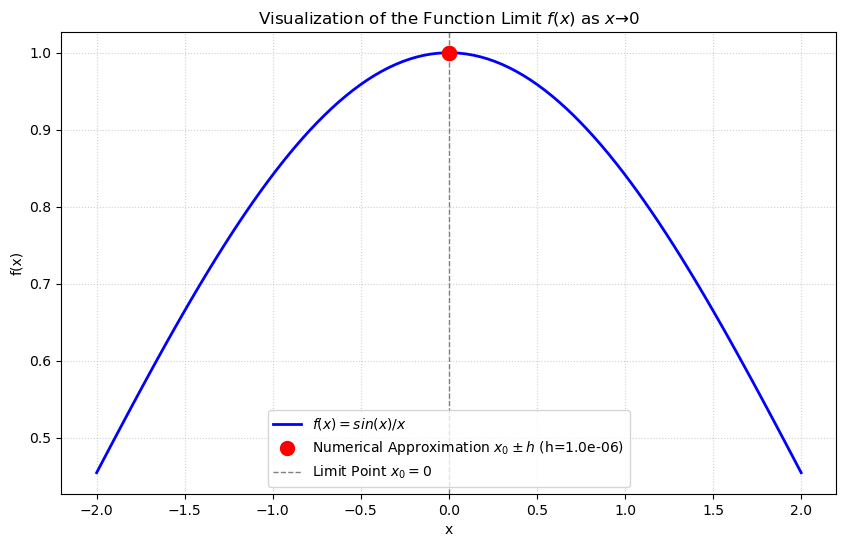


Visualization 2: Limit of 1/x as x -> 0 (Infinite Discontinuity)


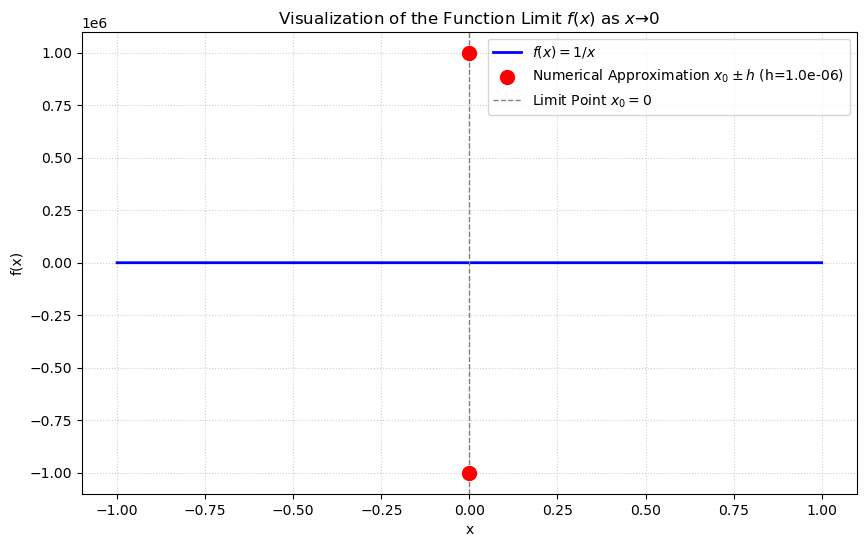


Visualization 3: Limit of x^2 as x -> 3 (Continuous)


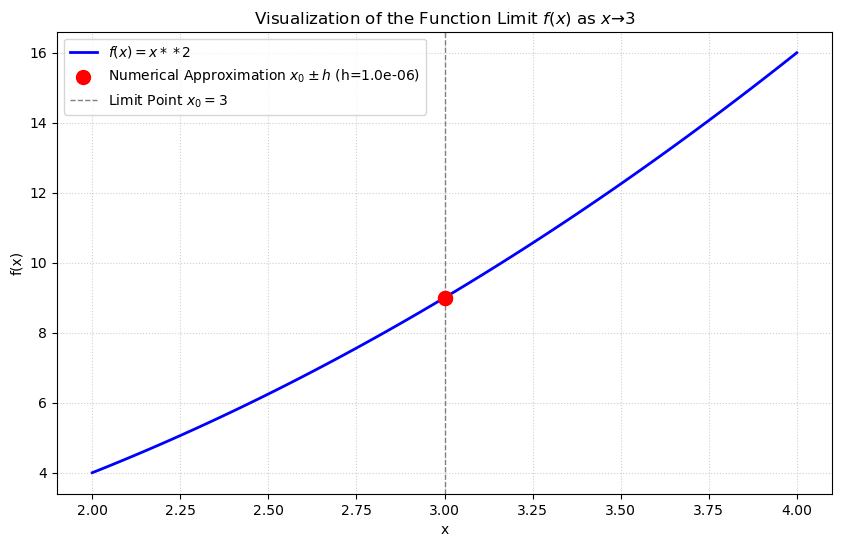

In [7]:
## EXAMPLE 3: Visualization of Limits

# --- 1. Removable Discontinuity ---
print("Visualization 1: Limit of sin(x)/x as x -> 0 (Removable Discontinuity)")
# The limit is 1. The plot should show approximation points near y=1.
visualize_limit("sin(x)/x", x0=0, h_window=2.0, h_approx=1e-6)


# --- 2. Infinite Discontinuity (Vertical Asymptote) ---
print("\nVisualization 2: Limit of 1/x as x -> 0 (Infinite Discontinuity)")
# The function approaches +/- infinity. The plot shows the asymptotic behavior.
visualize_limit("1/x", x0=0, h_window=1.0, h_approx=1e-6)


# --- 3. Limit at a point of continuity ---
print("\nVisualization 3: Limit of x^2 as x -> 3 (Continuous)")
# The function is continuous, so the limit equals the function value.
visualize_limit("x**2", x0=3, h_window=1.0, h_approx=1e-6)

In [8]:
##EXAMPLE 1: Symbolic Derivatives (Exact)

# --- 1. First Derivative of a Polynomial ---
func_1 = "3*x**4 - 2*x + 10"
order_1 = 1
deriv_1 = symbolic_derivative(func_1, order=order_1)

print(f"Function: f(x) = {func_1}")
print(f"1st Derivative: {deriv_1}") # Expected: 12*x**3 - 2


# --- 2. Second Derivative of a Trigonometric Function ---
func_2 = "cos(x)"
order_2 = 2
deriv_2 = symbolic_derivative(func_2, order=order_2)

print(f"\nFunction: f(x) = {func_2}")
print(f"2nd Derivative: {deriv_2}") # Expected: -cos(x)


# --- 3. Third Derivative of an Exponential Function ---
func_3 = "exp(2*x)"
order_3 = 3
deriv_3 = symbolic_derivative(func_3, order=order_3)

print(f"\nFunction: f(x) = {func_3}")
print(f"3rd Derivative: {deriv_3}") # Expected: 8*exp(2*x)

Function: f(x) = 3*x**4 - 2*x + 10
1st Derivative: 12*x**3 - 2

Function: f(x) = cos(x)
2nd Derivative: -cos(x)

Function: f(x) = exp(2*x)
3rd Derivative: 8*exp(2*x)


In [9]:
##EXAMPLE 2: Numerical Derivatives (Approximation)

# --- Define the function and test point ---
def func_for_numerical(x):
    # Function: f(x) = x^3 - x^2
    return x**3 - x**2

# Exact derivative: f'(x) = 3x^2 - 2x
x0_num = 1.5
h_val = 1e-6
exact_f_prime = 3*(1.5**2) - 2*(1.5) # Exact value at x=1.5 is 3.75

print(f"Test Point: x0 = {x0_num}, Exact f'(x0) = {exact_f_prime}")


# --- 1. Central Difference (CD) ---
# CD is generally more accurate (O(h^2))
cd_result = central_difference(func_for_numerical, x0_num, h=h_val, order=1)

print(f"\n1. Central Difference (h={h_val:.1e}): {cd_result:.8f}")
print(f"   Absolute Error (CD): {abs(cd_result - exact_f_prime):.2e}")


# --- 2. Forward Difference (FD) ---
# FD is less accurate (O(h))
fd_result = forward_difference(func_for_numerical, x0_num, h=h_val)

print(f"2. Forward Difference (h={h_val:.1e}): {fd_result:.8f}")
print(f"   Absolute Error (FD): {abs(fd_result - exact_f_prime):.2e}")


# --- 3. Central Difference (2nd Order) ---
# Exact second derivative: f''(x) = 6x - 2. At x=1.5, f''(1.5) = 6(1.5) - 2 = 7.0
exact_f_double_prime = 7.0
cd_2nd_result = central_difference(func_for_numerical, x0_num, h=h_val, order=2)

print(f"\n3. Central Difference (2nd Order): {cd_2nd_result:.8f}")
print(f"   Exact f''(x0) = {exact_f_double_prime}")

Test Point: x0 = 1.5, Exact f'(x0) = 3.75

1. Central Difference (h=1.0e-06): 3.75000000
   Absolute Error (CD): 3.64e-10
2. Forward Difference (h=1.0e-06): 3.75000350
   Absolute Error (FD): 3.50e-06

3. Central Difference (2nd Order): 7.00006719
   Exact f''(x0) = 7.0


Visualization 1: Good Approximation (Small h)


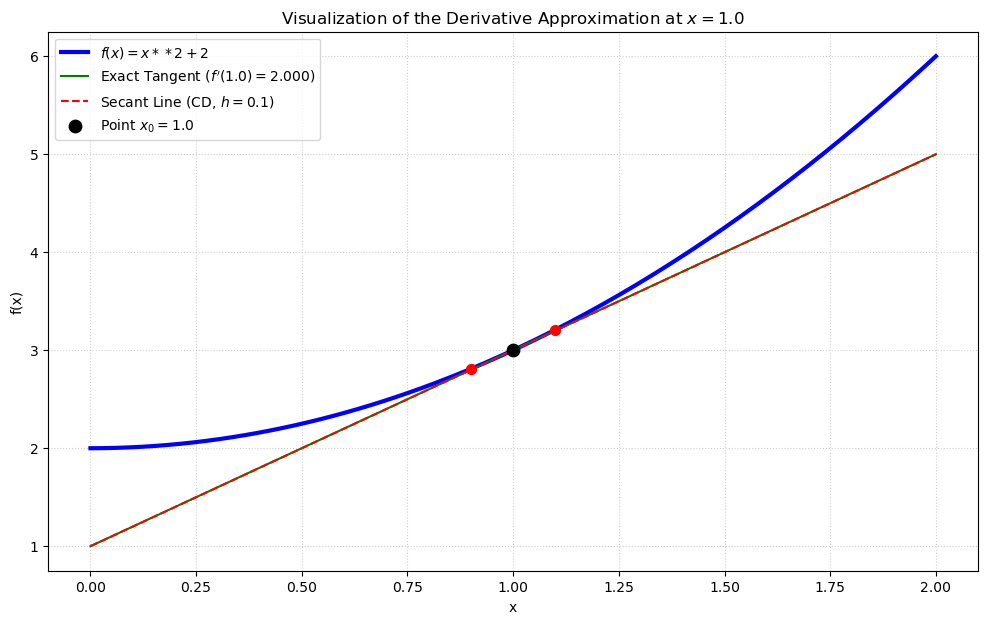


Visualization 2: Poor Approximation (Large h)


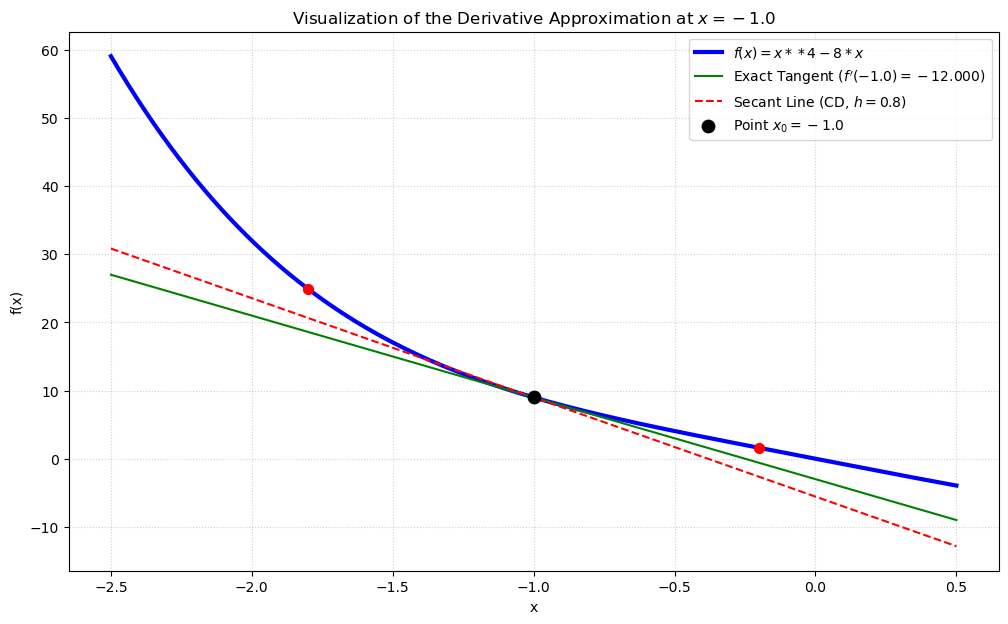


Visualization 3: Trigonometric Function


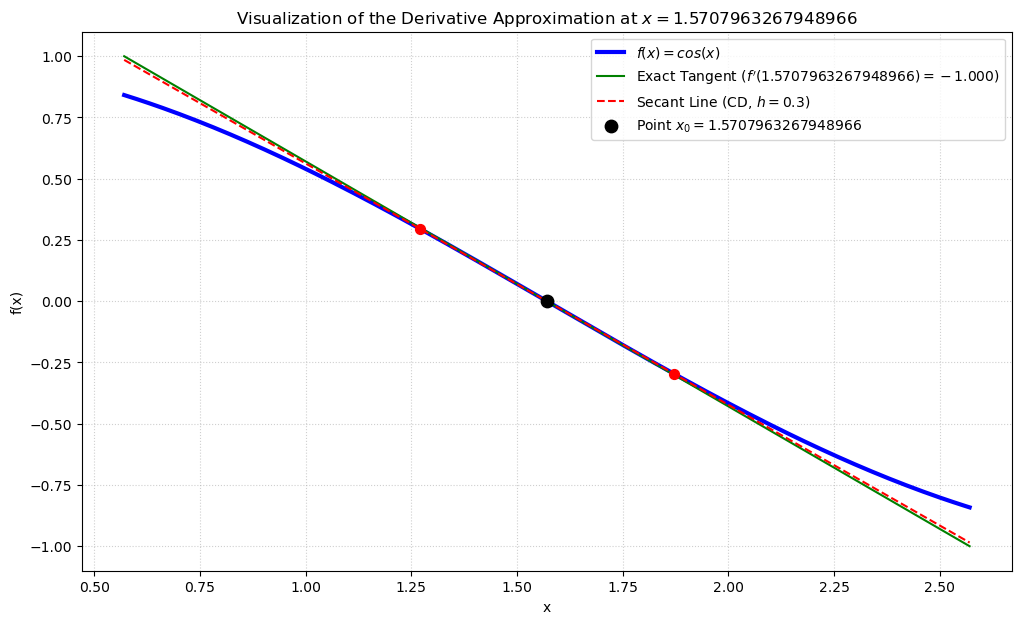

In [11]:
##EXAMPLE 3: Visualization of Derivative Approximation

# --- 1. Good Approximation (Small h_approx) ---
print("Visualization 1: Good Approximation (Small h)")
visualize_derivative(
    func_str="x**2 + 2",
    x0=1.0,
    h_step=1.0, # Window width
    h_approx=0.1 # Small step
)



# --- 2. Poor Approximation (Large h_approx) ---
print("\nVisualization 2: Poor Approximation (Large h)")
visualize_derivative(
    func_str="x**4 - 8*x",
    x0=-1.0,
    h_step=1.5, # Window width
    h_approx=0.8 # Large step, should show large error
)



# --- 3. Approximation on a Trigonometric Function ---
print("\nVisualization 3: Trigonometric Function")
visualize_derivative(
    func_str="cos(x)",
    x0=np.pi/2,
    h_step=1.0,
    h_approx=0.3
)


# Integrals Tests

In [4]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from pyMatan.integrals import IntegralSolver

In [ ]:
func_str = "x**2 * sin(x)"
solver = IntegralSolver(func_str)

print(f"Symbolic Calculation Test for: {func_str}")

indefinite = solver.symbolic_solve()
print(f"Antiderivative F(x): {indefinite}")

a, b = 0, float(np.pi)
exact_sym, exact_val = solver.symbolic_solve(a, b)

print(f"Exact expression on [{a}, {b}]: {exact_sym}")
print(f"Numeric value (Benchmark): {exact_val}")

--- Symbolic Calculation Test for: x**2 * sin(x) ---
Antiderivative F(x): -x**2*cos(x) + 2*x*sin(x) + 2*cos(x)
Exact expression on [0, 3.141592653589793]: 5.86960440108936
Numeric value (Benchmark): 5.86960440108936


In [12]:
n = 10 

print(f"Method Comparison at n={n}")

res_mid = solver.midpoint(a, b, n)
res_trap = solver.trapezoidal(a, b, n)
res_simp = solver.simpson(a, b, n)
res_gauss = solver.gauss_legendre(a, b, n) 

print(f"{'Method':<15} | {'Result':<18} | {'Error':<18}")
print(f"{'Midpoint':<15} | {res_mid:<18.8f} | {abs(res_mid - exact_val):<18.2e}")
print(f"{'Trapezoidal':<15} | {res_trap:<18.8f} | {abs(res_trap - exact_val):<18.2e}")
print(f"{'Simpson':<15} | {res_simp:<18.8f} | {abs(res_simp - exact_val):<18.2e}")
print(f"{'Gauss-Legendre':<15} | {res_gauss:<18.8f} | {abs(res_gauss - exact_val):<18.2e}")

Method Comparison at n=10
Method          | Result             | Error             
Midpoint        | 5.91016537         | 4.06e-2           
Trapezoidal     | 5.78845994         | 8.11e-2           
Simpson         | 5.86946946         | 1.35e-4           
Gauss-Legendre  | 5.86960440         | 1.78e-15          


In [7]:
print("Adaptive Integration Test")
target_tol = 1e-6

val_adapt, n_final, error_est = solver.adaptive('simpson', a, b, tol=target_tol)

print(f"Target tolerance: {target_tol}")
print(f"Result: {val_adapt}")
print(f"Final intervals (n): {n_final}")
print(f"Estimated Error (Runge): {error_est}")

assert error_est < target_tol, "Adaptive method failed to reach tolerance!"
print("Test Passed Successfully!")

Adaptive Integration Test
Target tolerance: 1e-06
Result: 5.869604332092898
Final intervals (n): 64
Estimated Error (Runge): 6.989135972190753e-08
Test Passed Successfully!


In [8]:
print("Improper Integral Test (Infinite Limits)")

gauss_solver = IntegralSolver("exp(-x**2)")

inf_res, inf_err = gauss_solver.improper_integral(-np.inf, np.inf)

true_val = np.sqrt(np.pi)

print(f"Function: exp(-x**2)")
print(f"Result (SciPy Quad): {inf_res}")
print(f"True Value (sqrt(pi)): {true_val}")
print(f"Absolute Difference: {abs(inf_res - true_val)}")

Improper Integral Test (Infinite Limits)
Function: exp(-x**2)
Result (SciPy Quad): 1.7724538509055159
True Value (sqrt(pi)): 1.7724538509055159
Absolute Difference: 0.0


In [11]:
print("Error Handling Test")

try:
    solver.simpson(0, 1, 11)
except ValueError as e:
    print(f"Caught expected error: '{e}'")
    print("Test Passed (Validation works).")
except Exception as e:
    print(f"Unexpected error: {e}")

Error Handling Test
Caught expected error: 'n must be an even number for Simpson's rule.'
Test Passed (Validation works).


Convergence Plot Generation


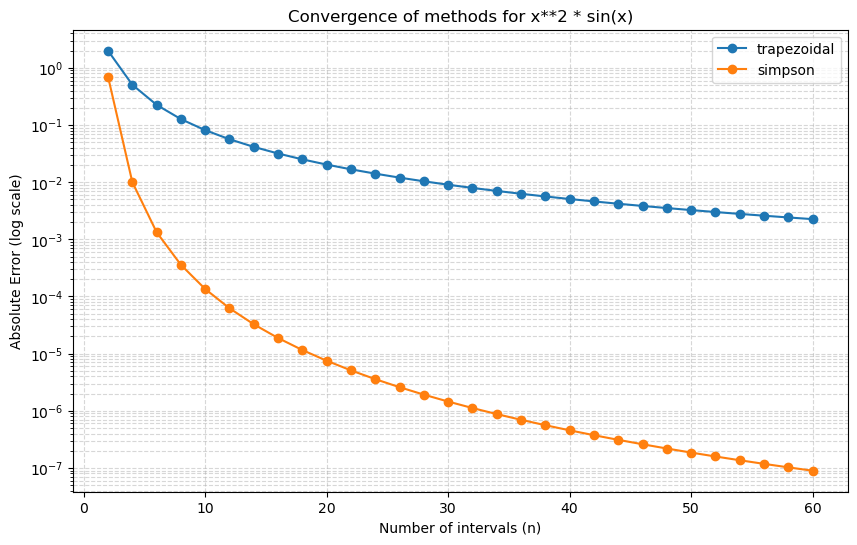

In [10]:
print("Convergence Plot Generation")
solver.plot_convergence(a, b, float(exact_val), max_n=60)